# 적응형 선형 뉴런과 학습의 수렴

## 경사 하강법

* 제곱 오차합(MSE)
$$ MSE = \frac{1}{n}\sum\limits_{i=1}^{n}{(w_i-\hat{y_i})^2} $$

![텍스트](https://backlog.com/wp-blog-app/uploads/2019/12/Nulab-Gradient-descent-for-linear-regression-using-Golang-Blog.png)

* 목적 함수(비용 함수) : 출력과 진짜 클래스 레이블 사이의 제곱 오차합(MSE)으로 비용 함수 정의, 제곱 오차합을 사용하는 이유는 상대적으로 오차가 커질수록 더 크게 함수에 영향을 주기 위해서.
$$ J(w) = \frac{1}{2}\Sigma_i(y^{(i)} - \phi(z^{(i)}))^2 $$

* 경사하강법을 적용하여 비용함수를 최소화 시키는 지점을 찾는다.

![텍스트](https://t1.daumcdn.net/cfile/tistory/2153D53C5917C05526)

$$ \Delta w = -\eta \nabla J(w) $$



### 배치 경사 하강법 & 확률적 경사 하강법

* 배치 경사 하강법은 가중치를 한 번 업데이트 할 때마다 모든 샘플에 대해 계산을 진행하므로 계산 비용이 매우 많이 든다. 이에 대한 대안으로 모든 샘플에 대한 오차의 합을 기반으로 가중치를 업데이트하는게 아닌 각 샘플에 대해 조금씩 가중치를 업데이트하는 확률적 경사 하강법이 있다.

* 처리해야할 데이터 수가 많아짐에 따라 가중치 업데이트에 모든 샘플에 대한 계산을 진행해야 하는 배치 경사 하강법에 비해 확률적 경사 하강법이 계산비용에 있어서 유리하다.

In [1]:
# Adaline 구현

class AdalineGD(object):
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta= eta
        self.n_iter= n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale =0.01, size = 1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum()
            self.cost_.append(cost)
            
        return self
            
            
            
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data'
                 ,header = None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

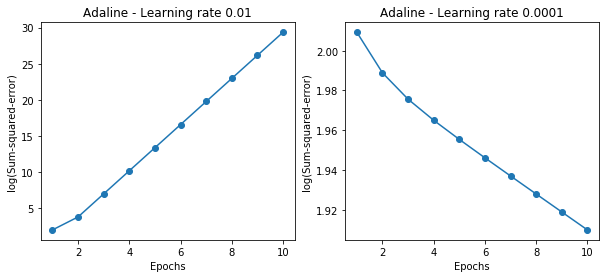

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4))

ada1 = AdalineGD(n_iter = 10, eta = 0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
# 학습률 eta가 너무 크다


ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
# 학습률 eta가 너무 작다. epochs를 올려서 결과 향상 가능
plt.show()

## 특성 스케일 조정을 통한 경사 하강법 결과 향상

* 표준화(standardization) : 데이터에 표준 정규 분포의 성질을 부여하여 학습이 좀 더 빠르게 수렵되도록 돕는다.
$$ x = \frac{x - \mu}{\sigma} $$

* 표준화가 비용함수에 미치는 영향

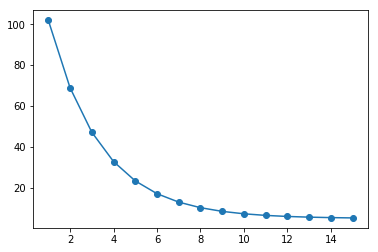

In [12]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

ada = AdalineGD(n_iter = 15, eta = 0.01)
ada.fit(X_std, y)

plt.plot(range(1, len(ada.cost_)+ 1), ada.cost_, marker='o')
plt.show()